In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_data = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 5], [9, 4], [8, 2]]) #training_points
y_data = [1, 1, 1, 1, 0, 0, 0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

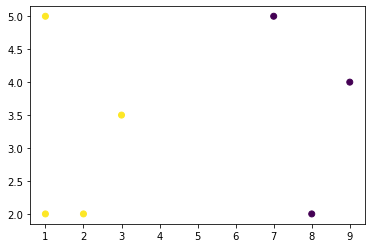

In [5]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [8]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


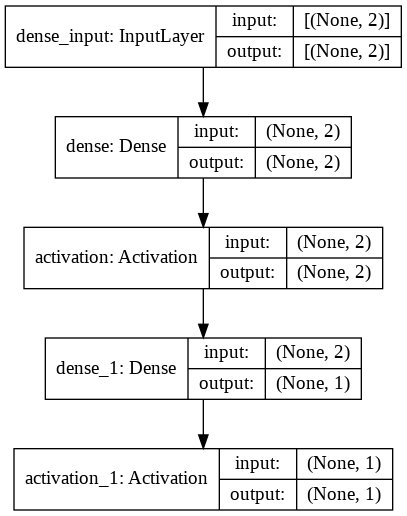

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_and.png', show_shapes=True)

In [11]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)


Epoch 1/500
7/7 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.5929
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8872
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.9185
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.6658
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 1.0000
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8827
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.6580
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 1.0000
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 1.0000
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8455
Epoch 11/500
7/7 [===========

Text(0.5, 0, 'epoch')

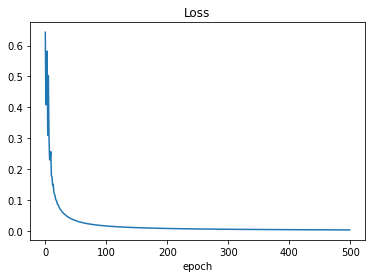

In [12]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

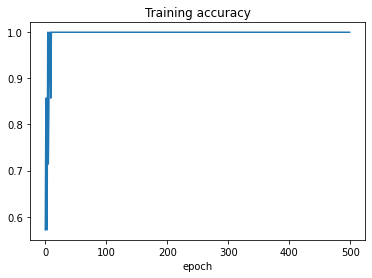

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

In [14]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.99787354]
 [0.99791104]
 [0.9962323 ]
 [0.9976549 ]
 [0.00398898]
 [0.00320292]
 [0.00320286]]


In [15]:
predicted = hypothesis > 0.5
print(predicted)

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
